# Distracting Crimes in Boston

If you are studying in Boston, will you get distracted?

Other people's code:

From Ben Batorsky (bpben): [github](https://github.com/filipemir/police-incident-dashboard/blob/master/make_geojson.ipynb)
- the contents of function "sql_to_df"
- the sql query in variable "sql"

Links:
- [my portfolio](github.com/DavidSmolinski/portfolio/tree/master/table%20of%20contents)

In [1]:
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt
import json
import requests


def sql_to_df(sql):
    # Ben's code start
    r = requests.get(f'https://data.boston.gov/api/3/action/datastore_search_sql?sql={sql}')
    j = r.json()['result']
    df = pd.DataFrame(j['records'],
                      columns=[x['id'] for x in j['fields']])
    # Ben's code end
    return df


year = '2019'
# Ben's code start
sql = f'SELECT * from "12cb3883-56f5-47de-afa5-3b1cf61b257b" WHERE "YEAR" = \'{year}\''
# Ben's code end

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 30)

In [3]:
df = sql_to_df(sql)
df.head(1)

,_id,_full_text,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,1,"'-09':10 '-29':11 '-71.09246318':24,26 '00':14...",I192078648,03114,Investigate Property,INVESTIGATE PROPERTY,B3,427,None,2019-09-29 06:39:00,2019,9,Sunday,6,Part Three,WILMORE ST,42.2779637,-71.09246318,"(42.27796370, -71.09246318)"


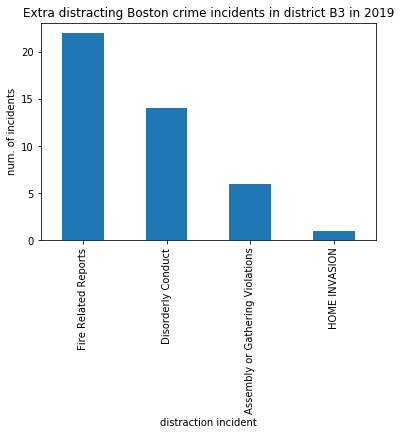

In [5]:
district = 'B3'
distractions = ['Aircraft', 'Assembly or Gathering Violations', 'Disorderly Conduct',
                'Explosives', 'Fire Related Reports', 'HOME INVASION']
df[(df.DISTRICT == district) & (df.OFFENSE_CODE_GROUP.isin(distractions))][
    'OFFENSE_CODE_GROUP'].value_counts().plot(kind='bar')
plt.title(f'Extra distracting Boston crime incidents in district {district} in {year}')
plt.ylabel('num. of incidents')
plt.xlabel('distraction incident')
plt.ylabel('num. of incidents')
plt.show()

In [6]:
# all values of OFFENSE_CODE_GROUP and OFFENSE_DESCRIPTION and their total for the year
df.groupby(['OFFENSE_CODE_GROUP','OFFENSE_DESCRIPTION']).OFFENSE_DESCRIPTION.count()

OFFENSE_CODE_GROUP                OFFENSE_DESCRIPTION                                       
Aggravated Assault                ASSAULT - AGGRAVATED                                           323
                                  ASSAULT - AGGRAVATED - BATTERY                                 574
Aircraft                          AIRCRAFT INCIDENTS                                               8
Arson                             ARSON                                                            6
Assembly or Gathering Violations  DEMONSTRATIONS/RIOT                                             20
                                  NOISY PARTY/RADIO-ARREST                                         1
                                  NOISY PARTY/RADIO-NO ARREST                                     31
Auto Theft                        AUTO THEFT                                                     329
                                  AUTO THEFT - LEASED/RENTED VEHICLE                              4